# ***Dataset Description***.



The selected dataset is "Real Estate Sales 2001–2022 GL".

* Link to download the CSV file: https://catalog.data.gov/dataset/real-estate-sales-2001-2018
* Link to download the Connecticut .geojson file (under "Download", then "GeoJSON"): https://deepmaps.ct.gov/datasets/CTDEEP::connecticut-state/explore?layer=1&location=41.484333%2C-72.649122%2C9.42


The Office of Policy and Management maintains a comprehensive record of all real estate transactions with a sale price of $2,000 or more occurring between October 1st and September 30th of each fiscal year. For each sales record, the dataset includes the following attributes: municipality, property address, sale date, property type (residential, apartment, commercial, industrial, or vacant land), sale price, and assessed property value.

The data is collected in accordance with the Connecticut General Statutes, Sections 10-261a and 10-261b: https://www.cga.ct.gov/current/pub/chap_172.htm#sec_10-261a https://www.cga.ct.gov/current/pub/chap_172.htm#sec_10-261b

This dataset is of particular interest as it enables the analysis of the real estate landscape in the State of Connecticut, serving as a reflection of broader trends in the United States during the first two decades of the 21st century.

## Variable Descriptions



* List Year: The year the property was listed.
* Date Recorded: The official date the property sale was recorded.
* Town: Municipality in which the property is located.
* Address: Street address of the property.
* Assessed Value: The value assigned to the property by the local government for taxation purposes.
* Sale Amount: Final sale price of the property.
* Sales Ratio: The percentage ratio between the assessed value and the final sale price.
* Property Type: Category of the property (e.g., residential, commercial, etc.).
* Residential Type: Indicates whether the property is a single-family or multi-family residence.
* Longitude: Geographic longitude coordinate of the property.
* Latitude: Geographic latitude coordinate of the property.
* Sale Year: Year in which the property sale was completed.
* Years on Market: Number of years the property remained listed before sale.






##Objectives

* Conduct an in-depth exploratory data analysis (EDA) to examine the behavior and dynamics of the real estate sector in the State of Connecticut over the 2001–2022 period.
* Develop a linear regression model to estimate property sale prices within Connecticut, using the variables Assessed Value, Sales Ratio, List Year and Residential Type as predictors.

#***Data Cleaning.***

An exhaustive exploration and cleaning of the dataset variables was performed to remove unnecessary attributes for the analysis, missing values, and erroneous records.

It was deemed appropriate to carry out a data transformation for a more accurate analysis, such as the creation of the columns "Years on Market," "Latitude," and "Longitude."

In [79]:
!pip install h3==3.7.7 --quiet
!pip install folium matplotlib mapclassify --quiet

In [80]:
import pandas as pd
import h3
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import folium
from folium import Element
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import matplotlib.colors as mpl_colors
import numpy as np

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [81]:
data = pd.read_csv("/content/Real_Estate_Sales_2001-2022_GL.csv")

/tmp/ipython-input-81-2549551422.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Real_Estate_Sales_2001-2022_GL.csv")


In [82]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,"139,020.00","232,000.00",0.60,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,"150,500.00","325,000.00",0.46,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,"253,000.00","430,000.00",0.59,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,"329,730.00","805,000.00",0.41,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,"130,400.00","179,900.00",0.72,Residential,Condo,NaN,NaN,NaN,NaN


In [83]:
data.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,"1,097,629.00","1,097,629.00","1,097,629.00","1,097,629.00","1,097,629.00"
mean,"537,035.69","2,011.22","281,801.58","405,314.56",9.60
std,"7,526,073.53",6.77,"1,657,890.08","5,143,492.36","1,801.66"
min,0.00,"2,001.00",0.00,0.00,0.00
25%,"30,713.00","2,005.00","89,090.00","145,000.00",0.48
50%,"80,706.00","2,011.00","140,580.00","233,000.00",0.61
75%,"170,341.00","2,018.00","228,270.00","375,000.00",0.77
max,"2,000,500,023.00","2,022.00","881,510,000.00","5,000,000,000.00","1,226,420.00"


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [85]:
# There are no duplicates in the dataset.
data.duplicated().values.any()

np.False_

In [86]:
# Changing the data type to datetime.
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])

In [87]:
# Creation of the latitude and longitude columns from the "Location" column.
data[["Longitude","Latitude"]] = data['Location'].str.replace("POINT","").str.replace("(","").str.replace(")","").str.strip().str.split(" ",expand=True).astype("Float64")

In [88]:
# Creation of the "Sale Year" column to facilitate the creation of charts.
data["Sale Year"] = data["Date Recorded"].dt.year.astype("Int64")

In [89]:
data['Town'].value_counts()

,count
Town,
Bridgeport,38158
Stamford,36629
Waterbury,32662
Norwalk,26939
New Haven,23705
...,...
Hartland,512
Canaan,507
Scotland,485


In [90]:
# Removal of row with unknown town.
data = data[data['Town'] != "***Unknown***"]

In [91]:
# Creation of the "Years on Market" column for future analyses.
data["Years on Market"] = data["Sale Year"] - data["List Year"]

/tmp/ipython-input-91-146949471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Years on Market"] = data["Sale Year"] - data["List Year"]


In [92]:
# Removal of columns irrelevant to our analysis.
data_clean = data.drop(columns=["Serial Number","Assessor Remarks","OPM remarks","Location", "Non Use Code"])

In [93]:
# Removal of rows with a value of 0 in "Assessed Value," "Sale Amount," and "Sales Ratio."
data_clean = data_clean[(data_clean['Assessed Value'] > 0.00) & (data_clean['Sale Amount'] > 0.00) & (data_clean['Sales Ratio'] > 0.00)]

In [94]:
# Errors are observed in the "Years on Market" column.
data_clean['Years on Market'].value_counts()

,count
Years on Market,
1,815164
0,273674
-2,15
-1,15
2,8
-3,6
-5,5
-9,4
3,3


In [95]:
# Removal of rows with incorrect date records.
data_clean = data_clean[data_clean['Years on Market'] >= 0 ]

In [96]:
# Most expensive property.
data_clean.loc[data_clean["Sale Amount"].idxmax()]

,75719
List Year,2020
Date Recorded,2021-08-19 00:00:00
Town,Willington
Address,456 TOLLAND TPKE
Assessed Value,"2,238,530.00"
Sale Amount,"5,000,000,000.00"
Sales Ratio,0.00
Property Type,Apartments
Residential Type,NaN
Longitude,<NA>


In [97]:
# Removal of row with a very large outlier value (5 billion dollars).
data_clean.drop(data_clean["Sale Amount"].idxmax(),inplace= True)

In [98]:
# Removal of records with atypical sales ratios.
data_clean = data_clean[(data['Sales Ratio'] < 2.50) & (data['Sales Ratio'] > 0.30)]

/tmp/ipython-input-98-2997975001.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clean = data_clean[(data['Sales Ratio'] < 2.50) & (data['Sales Ratio'] > 0.30)]


In [99]:
# Creation of the DataFrame without NAs in latitudes and longitudes for use in creating georeferenced charts.
data_clean_nona_lat_long = data_clean.dropna(subset=['Latitude', 'Longitude'])

# ***Statistical Analysis.***

A statistical analysis of the quantitative variables in the dataset is proposed to observe their behavior, distribution, and their maximum and minimum values.

In [100]:
data_clean['Years on Market'].value_counts()

,count
Years on Market,
1,747640
0,254587
2,7
3,3
4,1


In the "Years on Market" column, it can be observed that approximately 99% of the properties were sold within 1 year or less. This fact can be explained by a combination of institutional, economic, and technical factors related to how properties are recorded, published, and filtered in the state system.

Although the calculation performed is correct, the informative value of the "Years on Market" variable should be interpreted with caution and within the context of the dataset generation.

In [101]:
data_clean['Sale Amount'].describe()

,Sale Amount
count,"1,002,238.00"
mean,"388,255.80"
std,"1,334,712.11"
min,300.00
25%,"150,000.00"
50%,"235,000.00"
75%,"375,000.00"
max,"235,000,000.00"


In [102]:
data_clean['Assessed Value'].describe()

,Assessed Value
count,"1,002,238.00"
mean,"243,193.88"
std,"783,571.65"
min,140.00
25%,"95,600.00"
50%,"145,600.00"
75%,"232,400.00"
max,"142,858,700.00"


In [103]:
data_clean['Sales Ratio'].describe()

,Sales Ratio
count,"1,002,238.00"
mean,0.69
std,0.31
min,0.30
25%,0.50
50%,0.62
75%,0.77
max,2.50


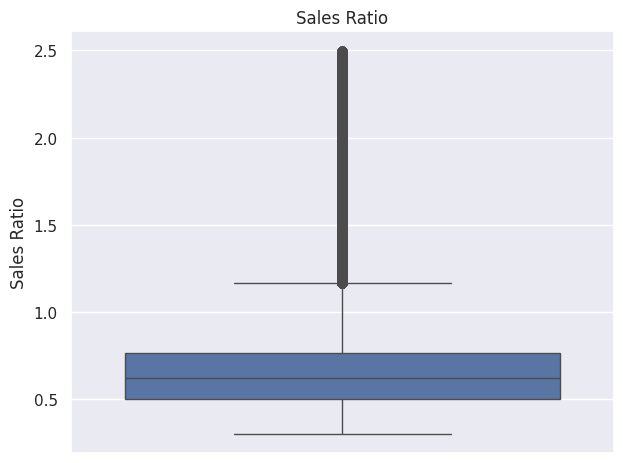

In [104]:
sns.boxplot(data_clean['Sales Ratio'])
plt.title('Sales Ratio')
plt.tight_layout()
plt.show()

# ***Visualization.***

Various charts are created in order to discover patterns in the data over time and across different geographic areas of the state of Connecticut.

*An analysis of the "Property Type" column is proposed, aiming to observe the differences in the number of properties sold according to property type.*

/tmp/ipython-input-105-2538888588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


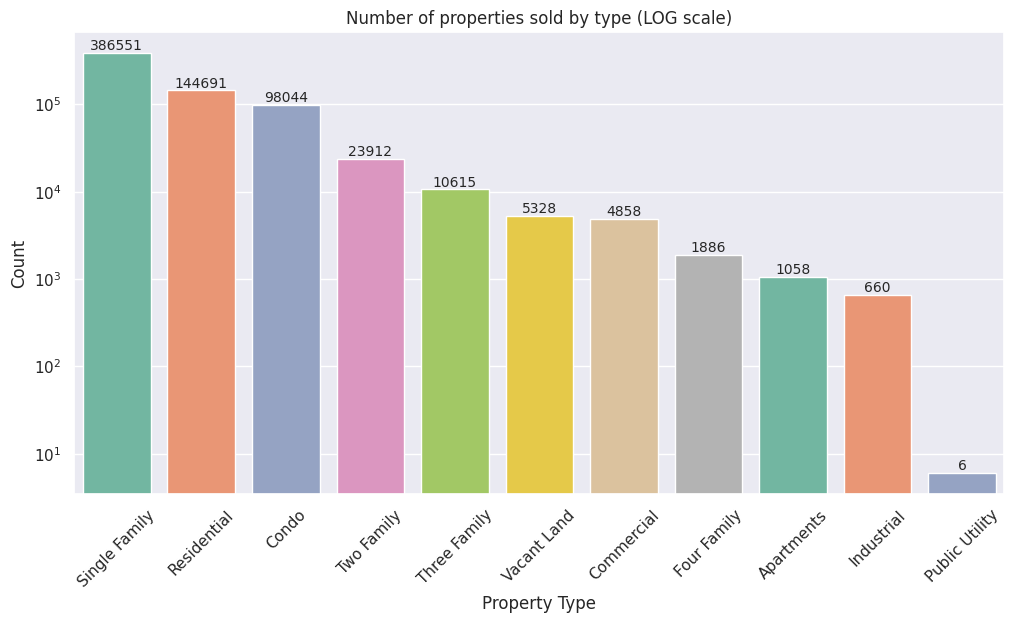

In [105]:
# We store in property_counts the data to be used
property_counts = data_clean['Property Type'].value_counts().reset_index()
property_counts.columns = ['Property Type', 'Count']

plt.figure(figsize=(12,6))
# We plot the bar chart; 'palette' sets the bar colors
ax = sns.barplot(
    data=property_counts,
    x='Property Type',
    y='Count',
    palette='Set2'
)

# Labels for the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Aesthetic adjustments
plt.xticks(rotation=45)
plt.title('Number of properties sold by type (LOG scale)')
plt.ylabel('Count')
plt.xlabel('Property Type')
plt.yscale('log')
plt.show()


This chart shows that the property type with the highest number of sales is 'Single Family'. The property type with the lowest number of sales is public use properties.

In [106]:
data_clean['Town'].value_counts()

,count
Town,
Bridgeport,33030
Stamford,30677
Waterbury,28401
Norwalk,25234
New Haven,21462
...,...
Warren,506
Hartland,461
Scotland,428


*As seen in the previous table, there are 169 cities, which presents a problem for graphing and comparison. Therefore, the 15 cities with the highest and lowest number of properties sold are selected.*

Text(0, 0.5, 'City')

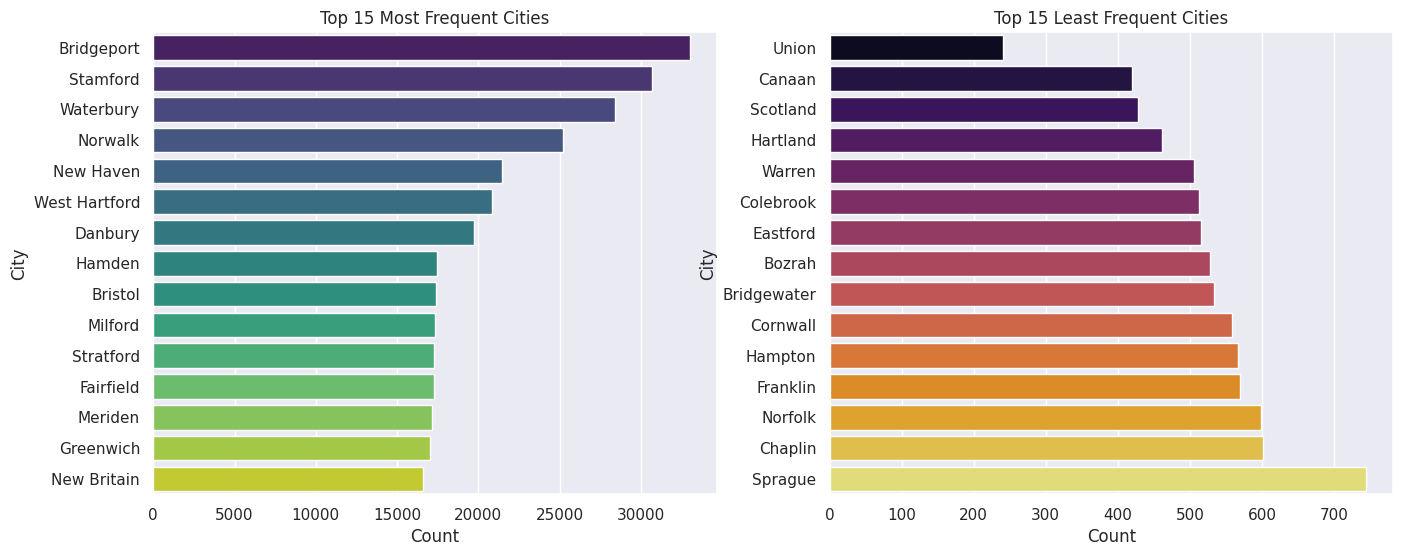

In [107]:
# Top 15 cities with the highest number of sales
altas = data_clean['Town'].value_counts().nlargest(15).reset_index()
altas.columns = ['Town', 'Count']

# Top 15 cities with the lowest number of sales
bajas = data_clean['Town'].value_counts().nsmallest(15).reset_index()
bajas.columns = ['Town', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for the most frequent cities
ax = sns.barplot(data=altas, ax=axes[0], x='Count', y='Town', palette='viridis', hue='Town', legend=False)
axes[0].set_title('Top 15 Most Frequent Cities')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('City')

# Bar plot for the least frequent cities
ax = sns.barplot(data=bajas, ax=axes[1], x='Count', y='Town', palette='inferno', hue='Town', legend=False)
axes[1].set_title('Top 15 Least Frequent Cities')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('City')



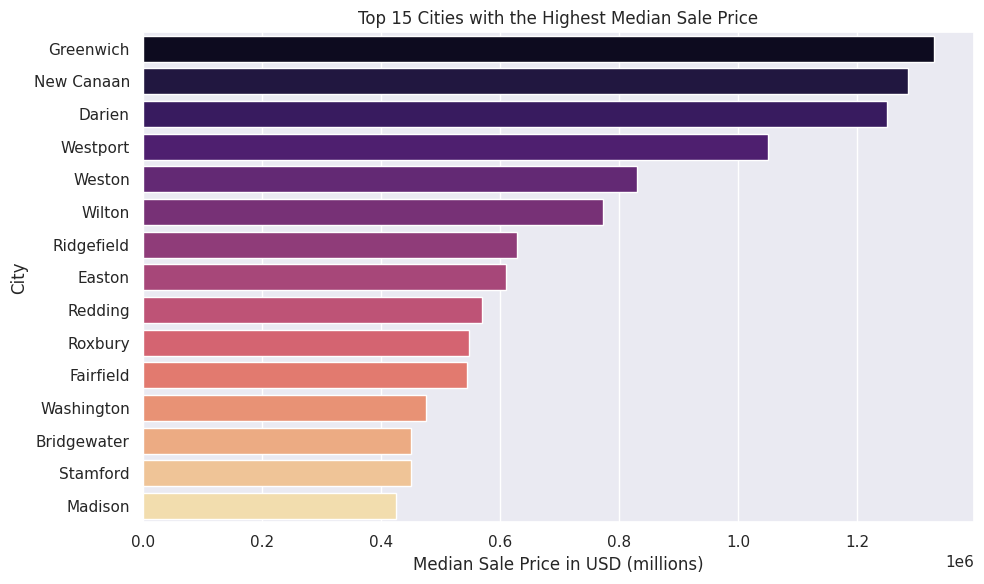

In [108]:
# Calculate the median Sale Amount by city and select the 15 most expensive
top_caras = data_clean.groupby('Town')['Sale Amount'].median().nlargest(15).reset_index()
top_caras.columns = ['Town', 'Median Sale Amount']

# Plot
plt.figure(figsize=(10, 6))

sns.barplot(data=top_caras,
            x='Median Sale Amount',
            y='Town', hue="Town",
            legend=False,
            palette="magma")

plt.title('Top 15 Cities with the Highest Median Sale Price')
plt.xlabel('Median Sale Price in USD (millions)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


The results appear to be very similar to those presented in the article [Top 10 Most Expensive Towns in Connecticut in 2024](https://www.lamacchiarealty.com/most-expensive-towns-connecticut-2024/).

<Axes: >

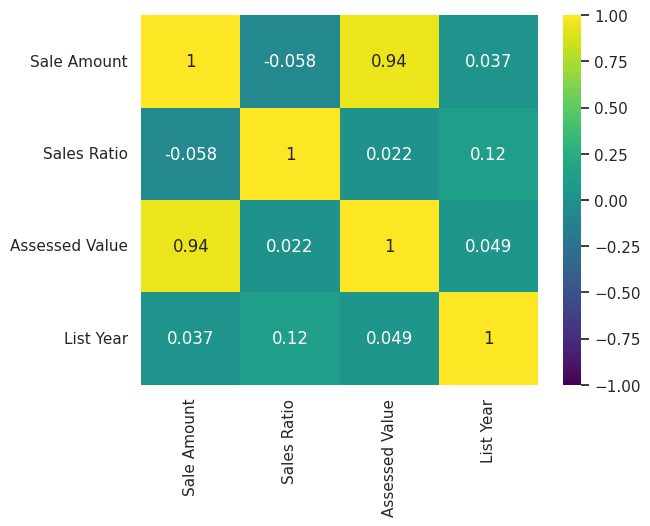

In [109]:
# Correlation matrix between variables related to sale price.
matriz_corr = data_clean[["Sale Amount","Sales Ratio","Assessed Value", 'List Year']].corr()
sns.heatmap(matriz_corr,vmin=-1,vmax=1,annot = True,cmap="viridis")

There is a strong positive correlation between the variables "Assessed Value" and "Sale Amount" in the data.
A negative correlation is also observed between "Sale Amount" and "Sales Ratio."

/tmp/ipython-input-110-1142333973.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10*0, None)


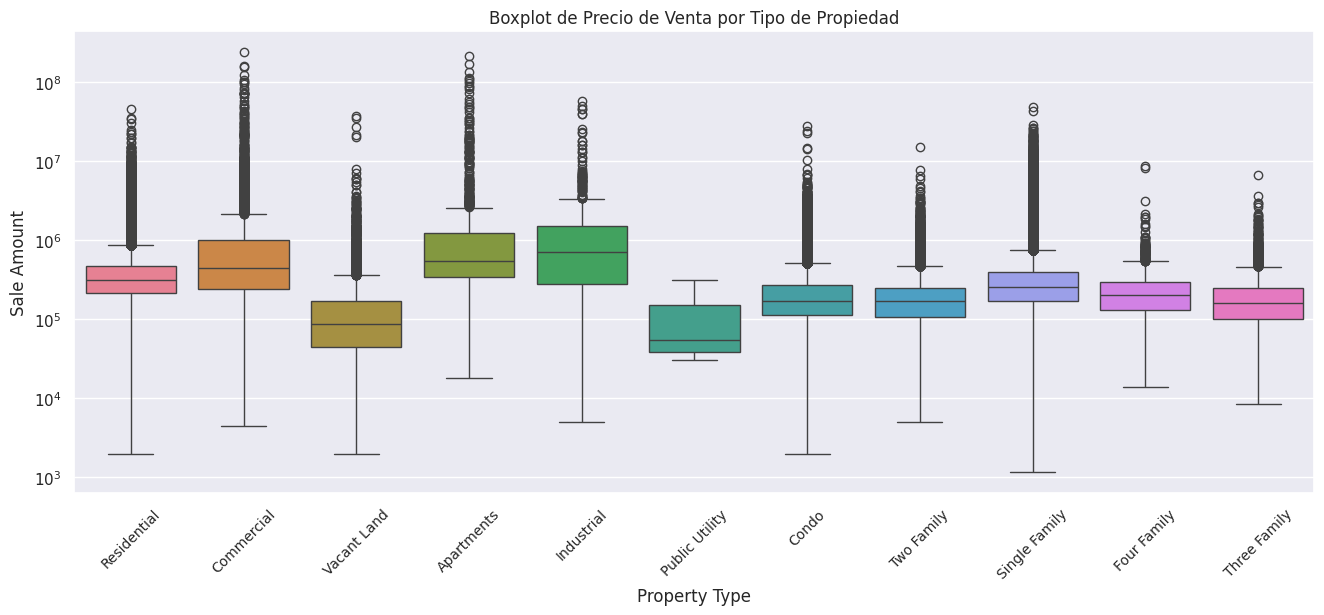

In [110]:
plt.figure(figsize=(16,6))
sns.boxplot(data = data_clean,x="Property Type",y = "Sale Amount",hue = "Property Type")
plt.yscale('log')
plt.title("Boxplot de Precio de Venta por Tipo de Propiedad")
plt.legend().remove()
plt.ylim(10*0, None)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

*How does the median price evolve over the years? Are there any observable patterns or trends?*

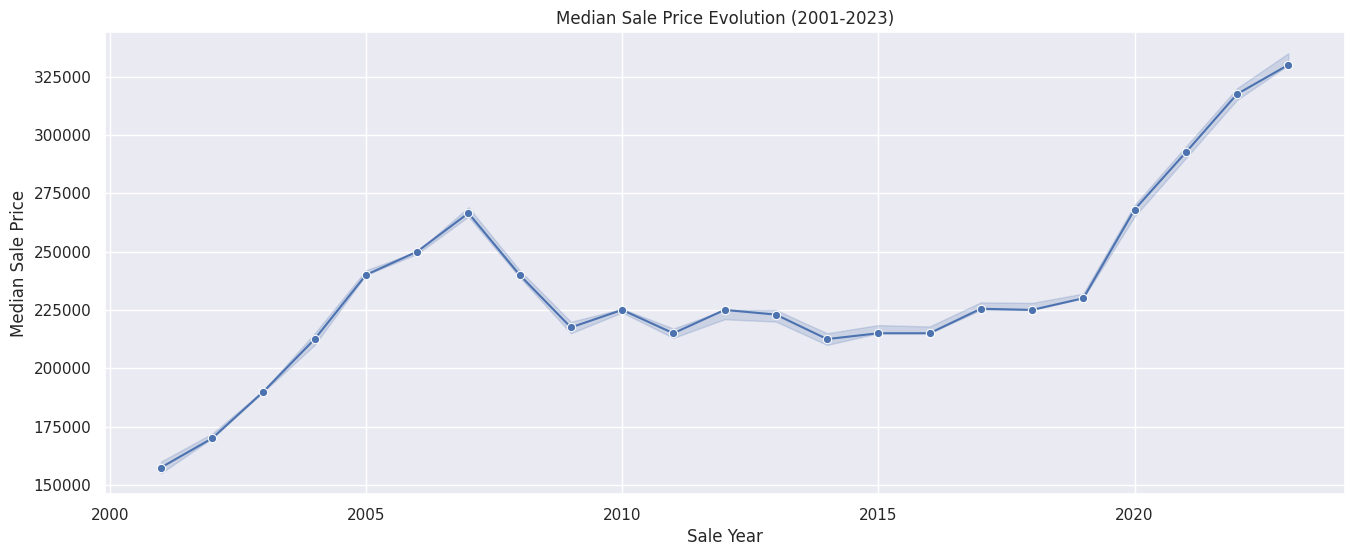

In [111]:
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=data_clean,
    x="Sale Year",
    y="Sale Amount",
    estimator="median",
    marker="o"
)
plt.title("Median Sale Price Evolution (2001-2023)")
plt.ylabel("Median Sale Price")
plt.show()

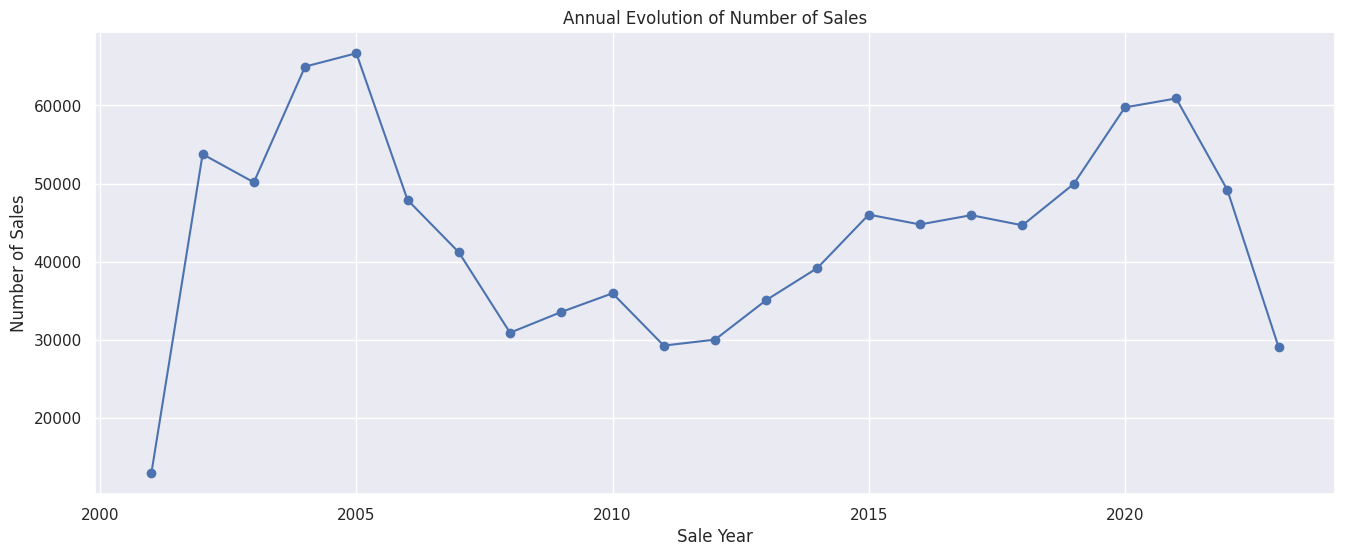

In [112]:
sales_per_year = data_clean.groupby("Sale Year").size().reset_index(name="Sales")

plt.figure(figsize=(16, 6))
plt.plot(sales_per_year["Sale Year"],
         sales_per_year["Sales"],
         marker='o')
plt.title("Annual Evolution of Number of Sales")
plt.xlabel("Sale Year")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()



The decline in the number of properties sold during the period from 2005 to 2008 is consistent with the [2008 financial crisis](https://en.wikipedia.org/wiki/2008_financial_crisis). It can be seen that after this decline, the number of properties sold in the data never again reaches the 2005 peak.

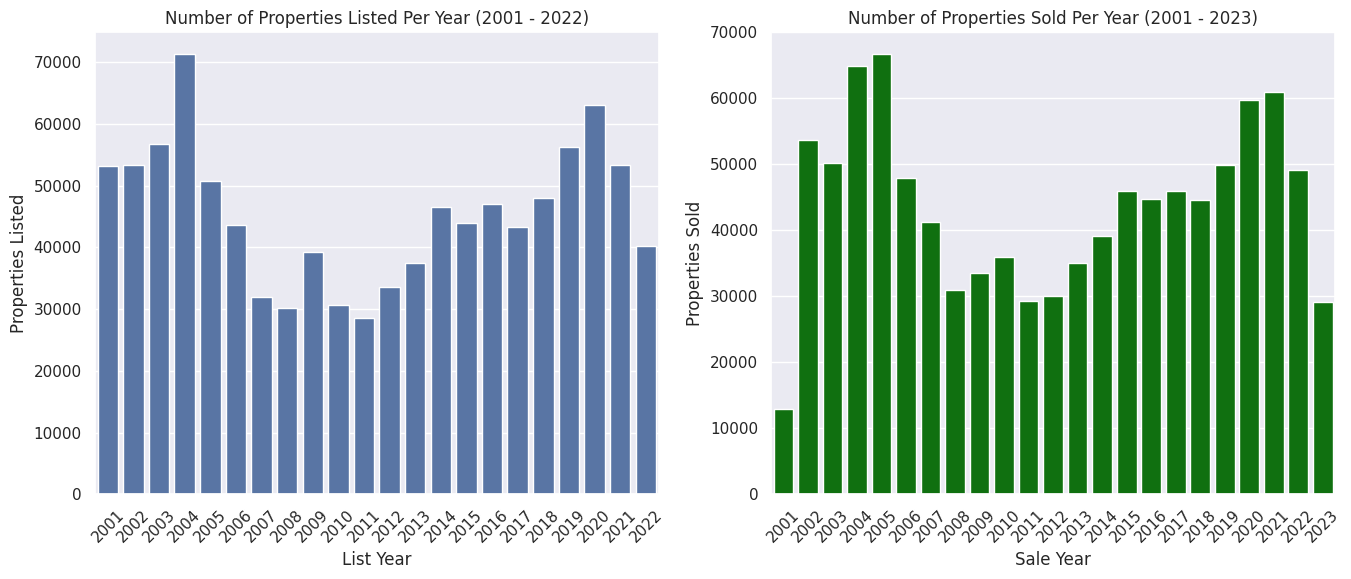

In [113]:
# Number of properties listed per year.
prop_listadas_año = data_clean["List Year"].value_counts().sort_index()
# Number of properties sold per year.
prop_vendidas_año = data_clean["Sale Year"].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(prop_listadas_año, ax=axes[0])
axes[0].set_title("Number of Properties Listed Per Year (2001 - 2022)")
axes[0].set_ylabel("Properties Listed")
plt.setp(axes[0].get_xticklabels(), rotation=45)

sns.barplot(prop_vendidas_año, ax=axes[1], color="green")
axes[1].set_title("Number of Properties Sold Per Year (2001 - 2023)")
axes[1].set_ylabel("Properties Sold")
plt.setp(axes[1].get_xticklabels(), rotation=45)

plt.show()


***Average sale value by month and year: evolution of the strength of the real estate market (2001–2023).***

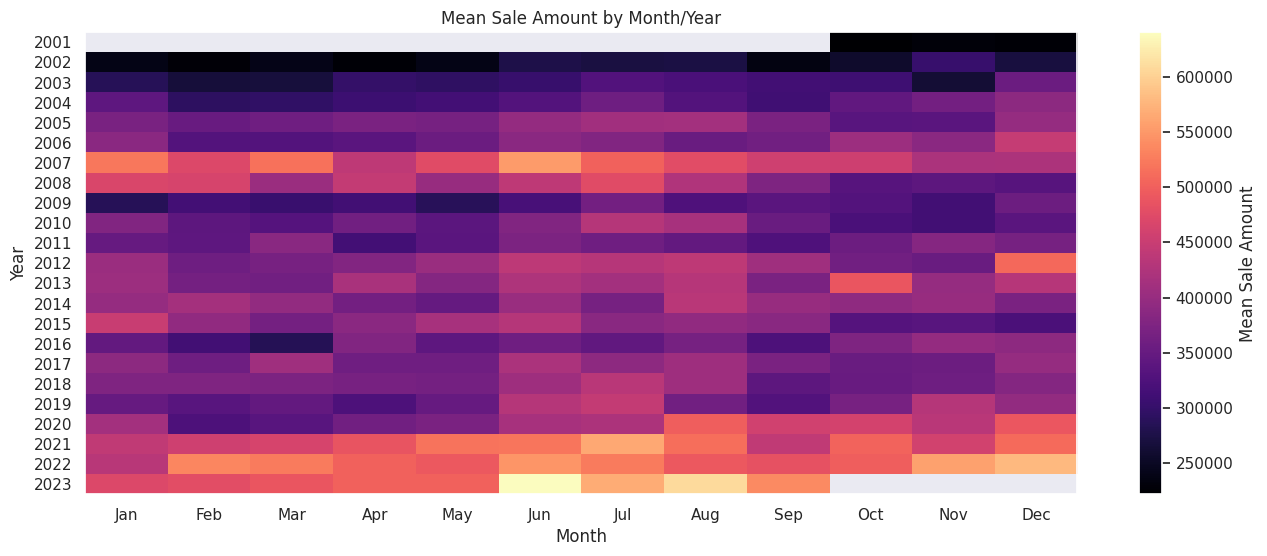

In [114]:
df = data_clean.copy()
df['year']  = df['Date Recorded'].dt.year
df['month'] = df['Date Recorded'].dt.month

# Pivot table of mean sale amount by year and month
media = (
    df
    .groupby(['year', 'month'])['Sale Amount']
    .mean()
    .unstack()
)

plt.figure(figsize=(16, 6))

# Use extent to correctly align axis ticks
plt.imshow(
    media,
    aspect='auto',
    cmap='magma',
    extent=[0.5, 12.5, media.index[-1] + 0.5, media.index[0] - 0.5]
)

# Colorbar
plt.colorbar(label='Mean Sale Amount')

# Labels and ticks
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(media.index.min(), media.index.max() + 1))

# Titles and axes labels
plt.title("Mean Sale Amount by Month/Year")
plt.xlabel("Month")
plt.ylabel("Year")

plt.grid(False)
plt.show()


# ***H3.***

Creation of an interactive plot using the [h3](https://pypi.org/project/h3/) module to observe the behavior of averages across different geographic areas of the state of Connecticut.

In [115]:
data_clean_nona_lat_long["hex_id"] = data_clean_nona_lat_long.apply(
            lambda row: h3.geo_to_h3(row["Latitude"], row["Longitude"], 6),
            axis=1  )

/tmp/ipython-input-115-2928242178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_nona_lat_long["hex_id"] = data_clean_nona_lat_long.apply(


In [116]:
h3_mean = data_clean_nona_lat_long.groupby('hex_id')['Sale Amount'].mean()

In [117]:
def h3_to_polygon(h3_index):
  boundary = h3.h3_to_geo_boundary(h3_index, geo_json=True)
  return Polygon(boundary)

# Build the GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'h3_index': h3_mean.index},
    geometry=[h3_to_polygon(h) for h in h3_mean.index],
    crs='EPSG:4326'  # WGS84 lat/lon
)

In [118]:
gdf.set_index('h3_index', inplace=True)
gdf['mean_sale_amount'] = h3_mean

In [119]:
# Connecticut GeoJSON
ct = gpd.read_file("/content/Connecticut_State_2892193487961723047.geojson")

# Ensure CRS matches that of your hexagon GeoDataFrame
ct = ct.to_crs(gdf.crs)

# Connecticut boundary
hex_ct = gpd.clip(gdf, ct)

# Expand the state boundary (in degrees)
ct_buffered = ct.buffer(0.10)

# Clip with the expanded boundary
hex_ct = gdf[gdf.geometry.centroid.within(ct_buffered.unary_union)]


/tmp/ipython-input-119-544791397.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ct_buffered = ct.buffer(0.10)
/tmp/ipython-input-119-544791397.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_ct = gdf[gdf.geometry.centroid.within(ct_buffered.unary_union)]
/tmp/ipython-input-119-544791397.py:14: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hex_ct = gdf[gdf.geometry.centroid.within(ct_buffered.unary_union)]


In [120]:
# Scale limits
vmin = hex_ct['mean_sale_amount'].min()
vmax = hex_ct['mean_sale_amount'].max()
steps = np.linspace(vmin, vmax, 6)

# Generate the “inferno” palette in hex
mpl_colormap = plt.get_cmap('inferno')
hex_colors = [
    mpl_colors.rgb2hex(mpl_colormap(i))
    for i in np.linspace(0, 1, len(steps) - 1)
]

# Create the map without automatic legend
m = hex_ct.explore(
    column='mean_sale_amount',
    cmap='inferno',
    legend=False,
    tooltip=True,
    style_kwds={'fillOpacity': 0.7, 'color': 'black'},
    name='Mean Sale Amount'
)

folium.LayerControl().add_to(m)

# Colorbar style
bar_top    = 60     # px from the top edge
bar_right  = 10     # px from the right edge
bar_width  = 500    # width of the bar in px
bar_height = 16     # height of the bar
label_gap  = 6      # space between bar and labels

gradient_css = "linear-gradient(to right, " + ", ".join(hex_colors) + ")"

bar_div = f"""
<div style="
   position:absolute;
   top:{bar_top}px;
   right:{bar_right}px;
   width:{bar_width}px;
   height:{bar_height}px;
   background:{gradient_css};
   border:1px solid #444;
   z-index:9999;
"></div>
"""

# Labels with full values (with thousand separators)
label_top = bar_top + bar_height + label_gap

labels_div = f"""
<div style="
   position:absolute;
   top:{label_top}px;
   right:{bar_right}px;
   width:{bar_width}px;
   display:flex;
   justify-content:space-between;
   font-size:11px;
   font-family:Arial, sans-serif;
   color:#222;
   z-index:9999;
">
"""
for x in steps:
    formatted = f"{int(x):,}".replace(",", ".")
    labels_div += f"<span>{formatted}</span>"
labels_div += "</div>"

legend_html = bar_div + labels_div

# Inject CSS to move the layer control further down
css = f"""
<style>
.leaflet-top.leaflet-right .leaflet-control-layers {{
    top: {label_top + 30}px !important;
}}
</style>
"""

# Add the CSS and HTML to the map
m.get_root().html.add_child(Element(css))
m.get_root().html.add_child(Element(legend_html))

# Display the map
m


#***Linear Regression***

The goal is to build a linear regression model to estimate the prices of different homes in the Connecticut area based on the variables Assessed Value, Sales Ratio, List Year, and Residential Type.

In [121]:
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [122]:
data_clean.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude,Sale Year,Years on Market
0,2022,2023-01-30,Andover,618 ROUTE 6,"139,020.00","232,000.00",0.60,Residential,Single Family,-72.34,41.73,2023,1
1,2020,2021-09-13,Ansonia,230 WAKELEE AVE,"150,500.00","325,000.00",0.46,Commercial,NaN,<NA>,<NA>,2021,1
2,2020,2020-10-02,Ashford,390 TURNPIKE RD,"253,000.00","430,000.00",0.59,Residential,Single Family,<NA>,<NA>,2020,0
3,2021,2022-07-05,Avon,53 COTSWOLD WAY,"329,730.00","805,000.00",0.41,Residential,Single Family,-72.85,41.78,2022,1
4,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,"130,400.00","179,900.00",0.72,Residential,Condo,<NA>,<NA>,2021,1


In [123]:
# Standardize the numerical variables
numeric_vars = ['Assessed Value', 'Sales Ratio', 'List Year']
df_clean_standar = data_clean[numeric_vars + ['Property Type'] + ['Residential Type'] + ['Sale Amount']].copy()

df_clean_standar[numeric_vars] = StandardScaler().fit_transform(data_clean[numeric_vars])
df_clean_standar


,Assessed Value,Sales Ratio,List Year,Property Type,Residential Type,Sale Amount
0,-0.13,-0.29,1.56,Residential,Single Family,"232,000.00"
1,-0.12,-0.73,1.27,Commercial,NaN,"325,000.00"
2,0.01,-0.32,1.27,Residential,Single Family,"430,000.00"
3,0.11,-0.90,1.42,Residential,Single Family,"805,000.00"
4,-0.14,0.12,1.27,Residential,Condo,"179,900.00"
...,...,...,...,...,...,...
1097624,-0.23,1.45,1.12,Single Family,Single Family,"53,100.00"
1097625,-0.22,0.68,1.12,Single Family,Single Family,"76,000.00"
1097626,-0.16,-0.36,1.12,Single Family,Single Family,"210,000.00"
1097627,-0.05,0.12,1.12,Single Family,Single Family,"280,000.00"


In [124]:
model = smf.ols(
    data= df_clean_standar,
    formula='Q("Sale Amount") ~ Q("Assessed Value") + Q("Sales Ratio") + Q("List Year") + C(Q("Residential Type"))'
)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Sale Amount")   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 9.131e+05
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:40:57   Log-Likelihood:            -8.9683e+06
No. Observations:              665699   AIC:                         1.794e+07
Df Residuals:                  665691   BIC:                         1.794e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

The linear regression model demonstrates a strong explanatory power, with an adjusted R-squared of 0.906, indicating that approximately 90.6% of the variance in "Sale Amount" is explained by the predictors: "Assessed Value," "Sales Ratio," "List Year," and the categorical variable "Residential Type."

All predictors are statistically significant (p < 0.001), with "Assessed Value" showing the largest positive coefficient, suggesting it is the strongest driver of sale prices. The negative coefficient for "Sales Ratio" indicates an inverse relationship with the sale amount.

The coefficients for different residential types reveal varying impacts on sale price relative to the baseline category (Condo), with "Four Family" and "Three Family" properties associated with the highest increases.

Diagnostic statistics such as the Durbin-Watson value close to 2 indicate no strong autocorrelation in residuals, while the large sample size (over 665,000 observations) supports robust inference. However, the high Jarque-Bera statistic and skewness suggest some deviation from normality in residuals, which could affect some inferential assumptions.

Overall, the model fits the data well and provides meaningful insights into factors influencing home sale prices in Connecticut. Further investigation into residual patterns and potential model improvements could enhance predictive performance.